# Introduction and definitions

**Why do we estimate f?**

- Purpose of ml is often to infer a function f that describes the relationship between target and features.

- Can estimate f for (1) prediction or (2) inference or both.

**How do we estimate f?**

- 3 basic approaches: parametric (assume shape of f and estimate coefficients), non-parametric (also estimate shape of f), semi-parametric.

- Accuracy depends on (1) irreducible error (variance of error term) and (2) reducible error (appropriateness of our model and its assumptions)

**Ingredients to statistical learning**

- Specify aim

- Gather and pre-process data

- Select a learning algorithm

- Apply learning algorithm to data to build (and train) a model

- Assess model performance (by testing) and tune model

- Make predictions

**Types of learning**

- Supervised (labelled examples)

- Unsupervised (unlabelled examples)

- Semi-supervised (labelled and unlabelled examples)

- Reinforcement

**The trade-off between prediction accuracy and model interpretability**

- Linear models vs non-linear models (hard to interpret models often predict more accurately).

**Supervised vs. unsupervised learning**

**Regression vs classification problems**

- Classification assigns categorical labels, regression real-valued labels to unlabelled examples.

**Hyperparameters vs parameters**

- Hyperparameters determine how the algorithm works and are set by the researcher.

- Parameters determine the shape of the model and are estimated. 

**Model-based vs instance-based learning**

- Model-based algorithms estimate and then use parameters to make predictions (i.e. can discard training data once you have estimate), instance-based algorithms (e.g. KNN) use the entire training dataset.

**Deep vs shallow learning**

- Shallow learning algorithms learn parameters directly from features, deep learning algorithms (deep neural network) learn them from the output of preceeding layers.

Sources of prediction error

- If we think about $Y = f(X) + \epsilon$

- Reducible error stems from our imperfect ability to estimate the model (the systematic relationship between X and y) i.e. the difference between $f$ and $\hat{f}$.
- Irreducible error stems from the fact that even if we could perfectly model the relationship between X and Y, Y would still be a function of the error term $\epsilon$, which we cannot reduce. This could be variables other than X that predict Y, or random variation in Y (e.g. purchasing behaviour on given day influenced by car breakdown).

Practical tips

- One way to get a sense of how non-linear the problem is, is to compare the MSE of a simple linear model and a more complex model. If the two are very close, then assuming linearity and using a simple model is preferrable.

# Feature engineering

## General points

- Having many uninformative features in your model might lower performance as it makes is more likely that the model overfits (e.g. including country names when predicting life satisfaction and using OECD sample finds that "w" in country name predicts high life satisfaction because of Norway, Switzerland, New Zealand, and Sweden. But this doesn't generalize to Rwanda and Zimbabwe). Hence, the more uninformative features, the bigger the chance that the model will find a pattern by chance in one of them in your training set.

## Process in practice

1. Brainstorm features
2. Decide what features to create
3. Create the features
4. Test impact on model performance
5. Interacting on features is useful
6. Iterate (go to 3 or 1)

Stuff to try:
- Ratios
- Counts
- Cutoff points
- Iterate on features (change cutoff and see whether it makes a difference) 
- Rate of Change in Values
- Range of Values
- Density within Intervals of Time
- Proportion of Instances of Commonly Occurring Values
- Time Between Occurrences of Commonly Occurring Values

## Data processing

- Data transformations for individual predictors

- Data transformations for multiple predictors

- Dealing with missing values

- Removing predictors

- Adding predictors

- Binning predictors

## Measuring predictor importance

- Numeric outcomes

- Categorical outcomes

- Other approaches

## Feature selection

- Consequences of using non-informative predictors

- Approaches for reducing the number of predictors

- Wrapper methods

- Filter methods

- Selection bias

## Factors that can affect model performance

- Type III errors

- Measurement errors in the outcome

- Measurement errors in the predictors

- Distretising continuous outcomes

- When should you trust your model's prediction?

- The impact of a large sample

# Model selection and assessment

## Notes

The ultimate trade-off for model performance is between bias and variance. Simple models will have higher bias and lower variance, more complex models lower bias but higher variance (becuse they tend to overfit the training data).

Two things mainly determine model performance:

- Model complexity (validation curves in PDSH)
- Training data size (learning curves in PDSH)

What to do when model is underperforming?

1. Use a more complicated/flexible model
2. Use a less complicated/flexible model
3. Gather more training samples (make data longer)
4. Gather more data for additional features for each sample (make data wider)

Train and test vs cross-validation

- These approaches are complementary, as nicely explained in the [Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html) docs: the generall process is to split the data into a training and a testing dataset, and then to use cross-validation on the training data to find the optimal hyperparameters.

## Assessing model accuracy

Measuring the quality of fit

- MSE for regressions.

- Error rate for classification.

- Beware of overfitting! Maximise mse or error rate for testing data, not for training data (overfitting).

- Overfitting definition: situation where a simpler model with a worse training score would have achieved a better testing score.


The bias-variance trade-off

- MSE comprises (1) squared bias of estimate, (2) variance of estimate, and (3) variance of error. We want to minimise 1 and 2 (3 is fixed).

- Relationship between MSE and model complexity is U-shaped, because variance increases and bias decreases with complexity. We want to find optimal balance.

Classification setting

- Bayesian classifier as unattainable benchmark (we don't know P(y|x)).

- KNN one approach to estimate P(y|x), then use bayesian classifier.

- Intuition as for MSE error: testing error rate is U-shaped in K (higher K means more flexibel model).

## Cross validation

Use cases:
- Model assessment ("how good is model fit?")
- Model selection (hypterparameter tuning)

### Holdout set approach

How it works: 
- Split data into training and test data, fit model on the training data, assess on the test data.

Advantages:
- Conceptually simple and computationally cheap.

Disadvantages:
- Very sensitive to train-test split, especially for small samples.
- Because we only use a fraction of the available data to train the model, model fit is poorer comparated to using entire dataset, and thus we tend to overestimate test error.


### Leave one out cross-validation

How it works:
- If we have `n` observations, fit model using `n-1` observations and calculate MSE for nth observation. Repeat n times and then average MSEs to get test error rate.

Advantage:
- Deals with both problems of holdout set approach.

Disadvantage:
- Computationally expensive or prohibitive for large ns


### k-fold cross-validation

How it works:
- Similar to LOOCV (which is a special case where k = n), but we split data into k groups (folds), and then use each of them in turn as the test training set while training the model on the remaining k-1 folds. We again average the k MSEs to get the overall test error rate.

Advantage:
- Computationally cheaper than LOOCV
- Beats LOOCV in terms of MSE because it trades-off bias and variance in a more balanced way: LOOCV has virtually no bias (as we use almost the entire data to fit the model each time) but has higher variance because all k MSE estimates are highly correlated (because each model is fit with almost identical data). In contrast, training data for k-fold CV is less similar, meaning MSEs are less correlated, meaning reduction in variance from averaging is greater.

## Bootstrap

Use cases
- Model assessment ("how good is parameter fit?")

How it works
- To get an estimate for our model fit, we would ideally want to fit the model on many random population samples, so that we could then calculate means and standard deviations of our model assessment metric of interest.
- We can't draw multiple samples from the population, but the bootstrap mimics this approach by repeatedly sampling (with replacement) from our original sample.


## Confusion matrix

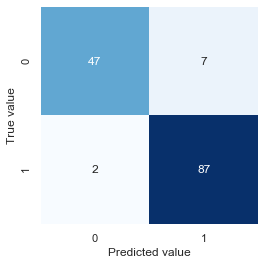

In [2]:
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = train_test_split(
    data.data, data.target, random_state=23124
)
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

mat = confusion_matrix(ytest, ymodel)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="Blues")
plt.xlabel("Predicted value")
plt.ylabel("True value");

### Terminology

Can think of "+" as "diseases" or "alternative hypothesis", and of "-" as "no disease" or "null hypothesis".

|     |Predicted | -                   | +                   |   |
| --- | -------- | :-----------------: | :-----------------: | - |
|True | -        | True negative (TN)  | False positive (FP) | N |
|     | +        | False negative (FN) | True positive (TP)  | P |
|     |          | N*                  | P*                  |   |


- True positive rate: $\frac{TP}{TP + FN} = \frac{TP}{P}$, is the proportion of positives that we correctly predict as such. Also called sensitivity, of hit rate, or recall.

- False positive rate: $\frac{FP}{FP + TN} = \frac{FP}{N}$, is the proportion of negatives events we incorrectly predict as positives. Also called the alarm rate or inverted specificity, where specificity is $\frac{TN}{FP + TN} = \frac{TN}{N}$.

- Precision: $\frac{TP}{TP + FP} = \frac{TP}{P*}$.

- Precision and recall originate in the field of information retrieval (e.g. getting documents from a query). In its original context, precision is useful documents as a proportion of all retrieved documents, recall the retrieved useful documents as a proportion of all available useful documents. In the context of machine learning, we can think of precision as positive predictive power (how good is the model at predicting the positive class), while recall is the same as sensitivity -- the proportion of all events that were successfully predicted.

## ROC curves and AUC

- Plots the trade-off between the false positive rate (x-axis) and the true positive rate (y-axis) - the trade-off between the false alarm rate and the hit rate.

- The ROC is useful because it directly shows false/true negatives (on the x-axis) and false/true positives (on the y-axis) for different thresholds and thus helps choose the best threshold, and because the area under the curve (AUC) can be interpreted as an overall model summary, and thus allows us to compare different models. 



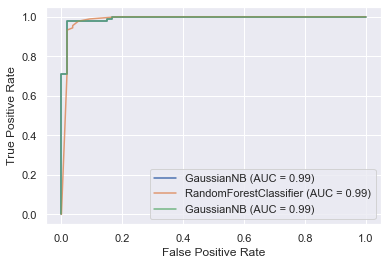

In [6]:
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = train_test_split(
    data.data, data.target, random_state=23124
)
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)
roc = plot_roc_curve(model, Xtest, ytest)

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(Xtrain, ytrain)
ax = plt.gca()
_ = plot_roc_curve(rfc, Xtest, ytest, ax=ax, alpha=0.8)
roc.plot(ax=ax, alpha=0.8);

## Precision-recall curves

- The precision-recall curve is particularly useful when we have much more no-event than event cases. In this case, we're often not interested much in correctly predicting no-events but focused on correctly predicting events. Because neither precision nor recall use true negatives in their calculations, they are well suited to this context ([paper](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432)).

- The precision recall curve plots precision (y-axis) and recall (x-axis). An unskilled model is a horizontal line at hight equal to the proportion of events in the sample. We can use ROC to compare models as different thresholds, or the F-score (the harmonic mean between precision and recall) at a specific threshold.

- Use precision-recall curves if classes are imbalanced, in which case ROC can be misleading (see example in last section [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)).

- Shape of curve: recall increases monotonically as we lower the threshold (move from left to right in the graph) because we'll find more and more true positives ("putting ones from the false negative to the true positive bucket", which increases the numerator but leaves the denominator unchanged), but precision needn't fall monotonically, because we also increase false positives (both the numerator and the denominator increase as we lower the threshold, and the movement of recall depends on which increases faster, which depends on the sequence of ordered predicted events). See [here](https://stats.stackexchange.com/a/183506) for a useful example.






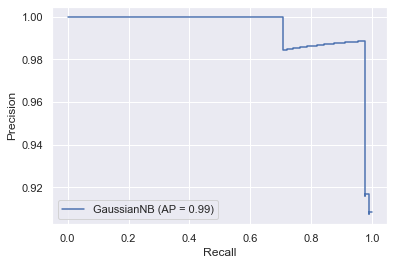

In [4]:
from sklearn.metrics import plot_precision_recall_curve

data = load_breast_cancer()
Xtrain, Xtest, ytrain, ytest = train_test_split(
    data.data, data.target, random_state=23124
)
model = GaussianNB()
model.fit(Xtrain, ytrain)
ymodel = model.predict(Xtest)

plot_precision_recall_curve(model, Xtest, ytest);

## Learning curves

# Sources

- [An introduction to statistical learning](https://www.statlearning.com)
- [Hands on machine learning with scikit-learn, keras, and tenserflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126/)
- [The hundred-page machine learning book](http://themlbook.com)
- [Applied predictive modeling](http://appliedpredictivemodeling.com)
- [video](https://www.youtube.com/watch?time_continue=109&v=drUToKxEAUA&feature=emb_logo)
- mlmastery [article](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)